Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 5**: Consider measuring the viscosity of a liquid by timing how long it takes a solid sphere to fall a specific distance in the liquid. Calculate the viscosity according to $$\mu=2\,(\rho_{S}-\rho_{L})\,\frac{g\,r^{2}\,t}{9\,l},$$ where $\rho_{S}$ and $\rho_{L}$ are the densities of the sphere and liquid respectively, $g=9.81$ms$^{-2}$ is the gravitational acceleration, $r$ the radius of the sphere, $l$ the length of the fall and $t$ the time it takes to fall the length $l$.

**Calculation data and errors**: The density numbers will have errors to consider. For the sphere, the mass is given as $m_{S}=0.021$ kg with uncertainty of $5\times10^{-4}$ kg and the radius is $0.01$ m with uncertainty of $5\times10^{-4}$ m.

For the liquid, the volume is given as $0.1$ m$^{3}$ with uncertainty of $5\times10^{-4}$ m$^{3}$ and mass of $0.14$ kg and uncertainty of $5\times10^{-4}$ kg.

The fall distance is marked as $0.1$ m and uncertainty $5\times10^{-4}$ m while the time measurement is taken as $3.2$ s with uncertainty $0.05$ s.

All uncertainties are assumed to be Gaussian distributed and hence given as single standard deviation precision. All given measurement values are considered to be independent from each other.

**Task**: Before purchasing equipment for this experiment and spending time and effort, you wish to check how precisely the viscosity can be determined in this case. Write a function `viscosity(err1, err2)` which calculates the array of viscosities according to the random error arrays `err1` and `err2` as input. 

**(a)** Write a Monte-Carlo simulation to find the distribution of viscosity measurements you could be taking if this experiment were to be performed. Simulate 1000 experiments, plot the viscosity distribution as a histogram with appropriate axes labels and print the mean and standard deviation.



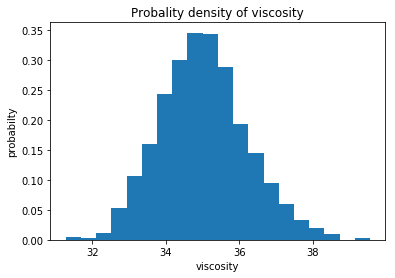

The mean of the viscosity is 35.01839401814447
The standard deviation is 1.1854734181463995


In [1]:
# YOUR CODE HERE
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def viscosfunc(Ms, Ml, r, Vl, t, l):
    '''This is the function that returns the viscosity of liquid'''
    ps = Ms/((4/3)*np.pi*(r**3))
    pl = Ml/Vl
    mu = 2*(ps - pl)*9.81*(r**2)*t/(9*l)
    return mu

def viscosity(err1, err2):
    '''This is the function that returns viscosity with error included'''
    if isinstance(err1, float):
        return viscosfunc(0.021, 0.14, 0.01, 0.1, 3.2, 0.1)
    else:
        collector = []
        for i in range(len(err1)):
            Ms = 0.021 + err1[i]
            Ml = 0.14 + err1[i]
            r = 0.01 + err1[i]
            Vl = 0.1 + err1[i]
            t = 3.2 + err2[i]
            l = 0.1 + err1[i]
            collector.append(viscosfunc(Ms, Ml, r, Vl, t, l))
        return np.array(collector)

def main():
    '''This is the main function that plots histogram'''
    err1 = np.random.normal(0.0, 0.0005, 1000)
    err2 = np.random.normal(0.0, 0.05, 1000)
    mu = viscosity(err1, err2)
    plt.hist(mu, density=1, bins=20)
    plt.ylabel('probabilty')
    plt.xlabel('viscosity')
    plt.title('Probality density of viscosity')
    plt.show()
    print('The mean of the viscosity is ' + str(np.mean(mu)))
    print('The standard deviation is ' + str(np.std(mu)))

main()


**(b)** Determine by computer experiment (iterate: change parameter, run) how to improve the viscosity precision most effectively. Consider changing individual observable uncertainty scales, one by one by the same fraction, re-run the simulation and observe the effect such a change has on the viscosity distribution width. 

Which observable uncertainty reduced to a smaller value would have the biggest beneficial effect on viscosity measurements? Name the observable in the text box below. Hint: you should notice one stand-out candidate observable.

YOUR ANSWER HERE:
Reducing the uncertainty, by dividing the error by 5, individually makes it clear that having the radius's error reduced to a smaller value will make the measurement a lot more precise. Through this iteration process all the standard deviation was above 1, after the change, except for the radius which had a standard deviation at around 0.6. 
So reducing the uncertainty of radius will have the greatest effect in increasing the viscosity precision.

In [4]:
# Test cell
mu0 = viscosity(0.0, 0.0)
assert (mu0>34.9 and mu0<35.0)

In [3]:
# Test cell
err1 = np.random.normal(0.0, 0.0005, 1000)
err2 = np.random.normal(0.0, 0.05, 1000)
mu = viscosity(err1, err2)
assert (np.mean(mu)>34.8 and np.mean(mu)<35.2)
assert (np.std(mu)>1.1 and np.std(mu)<1.3)

### Tests - 4 marks; Style - 1 mark; Plot - 2 marks